In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fancyimpute import KNN
from sklearn.model_selection import train_test_split

# error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Using TensorFlow backend.


In [3]:
#Set working directory
os.chdir(r"C:\Projects")

In [4]:
# Load data
df = pd.read_csv('day.csv')

In [5]:
# get current working directory
os.getcwd()

'C:\\Projects'

In [5]:
df.shape

(731, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis

# Here are some of the hypothesis which I thought could influence the demand of bikes:

Weekends :    casual users count will increase over weekend.

Humidity:     higher humidity will cause slower demand and vice versa. 

Temperature:  Temperature will have positive correlation with bike demand in cold countries.

Weather:      Clear weather will bring more users as compared to rainy/misty weather. 

Time (year):  Total demand will have higher contribution of registered user as compared to casual because registered                 user base would increase over time.


In [8]:
# To start this process, we will first try and look at the probability distributions of the continuous variables. 

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Temperature')]

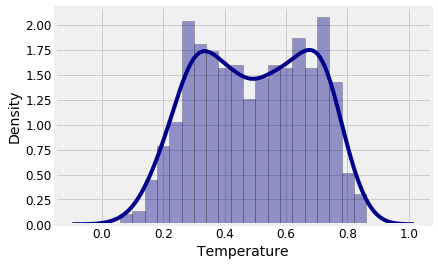

In [9]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['temp'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Temperature', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Humidity')]

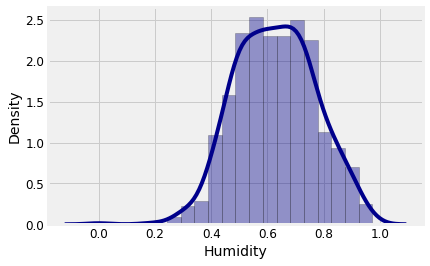

In [10]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['hum'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Humidity', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Count')]

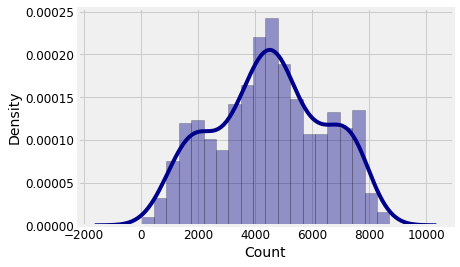

In [11]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['cnt'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Count', ylabel='Density')

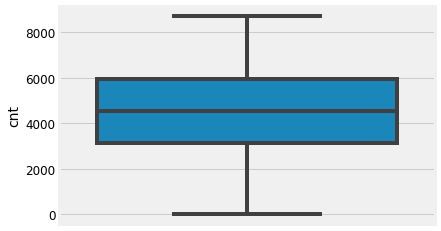

In [14]:
ax = sns.boxplot(x="cnt", data=df,orient='v')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'windspeed')]

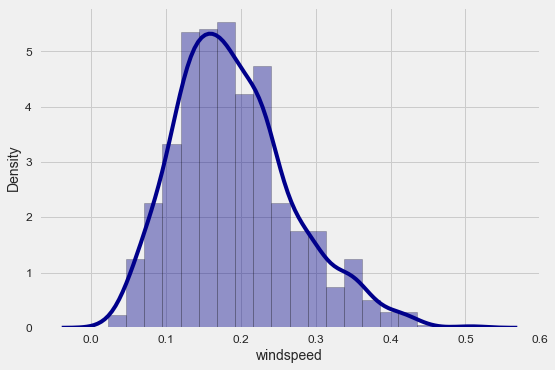

In [219]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['windspeed'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='windspeed', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Casual users')]

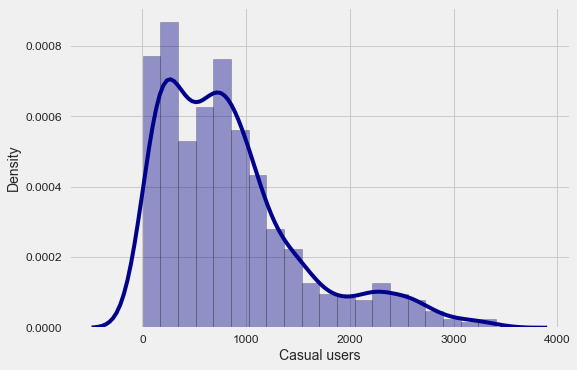

In [220]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['casual'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Casual users', ylabel='Density')


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'registered users')]

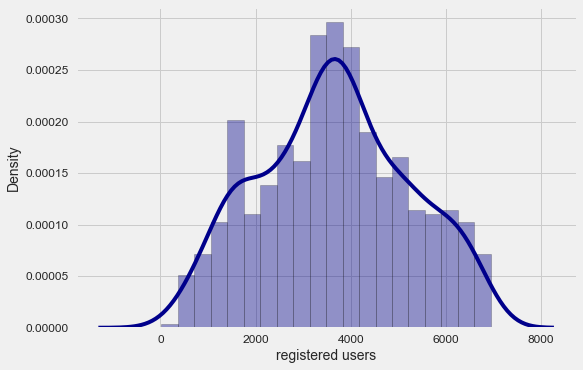

In [221]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['registered'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='registered users', ylabel='Density')


In [222]:
# lets plot the box plot to visualize the relationship of continuous variables w.r.t categorical variables

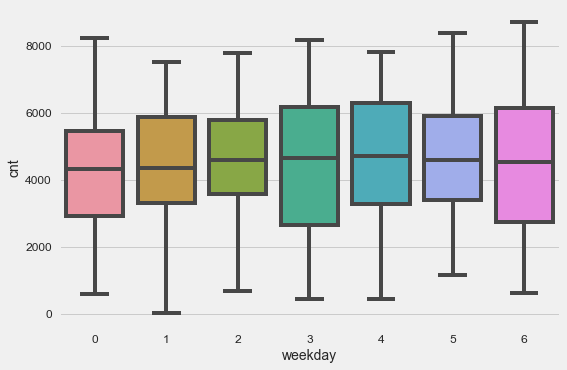

In [223]:
ax = sns.boxplot(x="weekday", y="cnt", data=df)

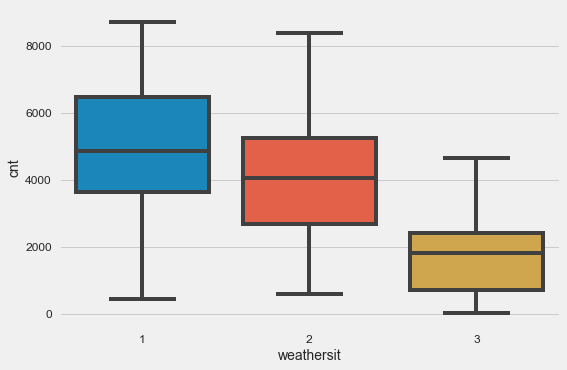

In [224]:
ax = sns.boxplot(x="weathersit", y="cnt", data=df)

# weathersit: (extracted fromFreemeteo)
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


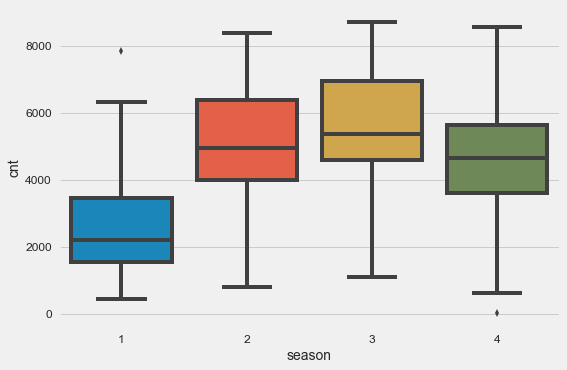

In [225]:
ax = sns.boxplot(x="season", y="cnt", data=df)
#season: Season (1:springer, 2:summer, 3:fall, 4:winter)

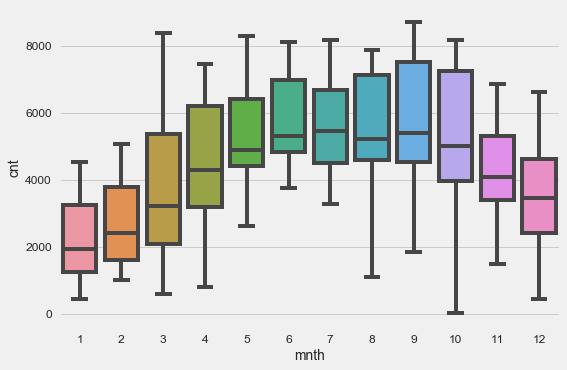

In [226]:
ax = sns.boxplot(x="mnth", y="cnt", data=df)

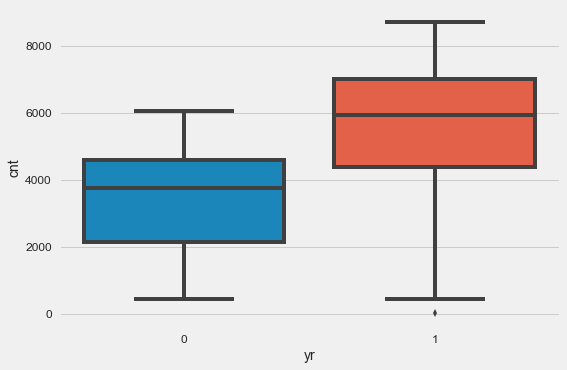

In [227]:
ax = sns.boxplot(x="yr", y="cnt", data=df)

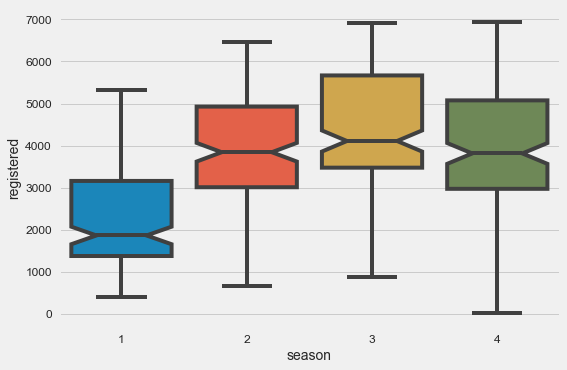

In [228]:
ax = sns.boxplot(x="season", y="registered", data=df, notch=True)

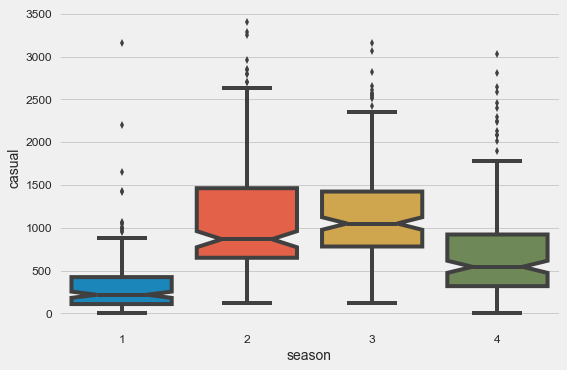

In [229]:
ax = sns.boxplot(x="season", y="casual", data=df, notch=True)

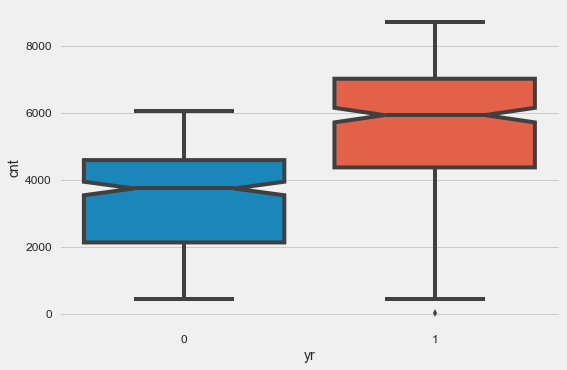

In [230]:
ax = sns.boxplot(x="yr", y="cnt", data=df, notch=True)

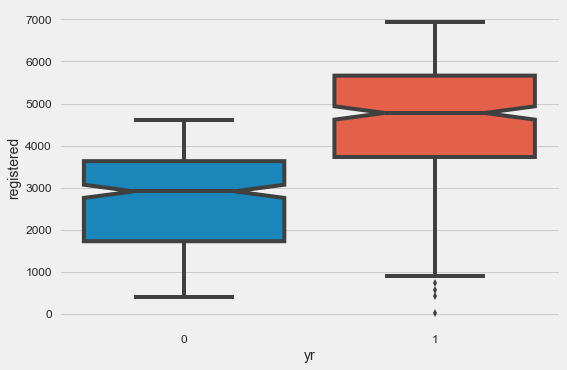

In [231]:
ax = sns.boxplot(x="yr", y="registered", data=df, notch=True)

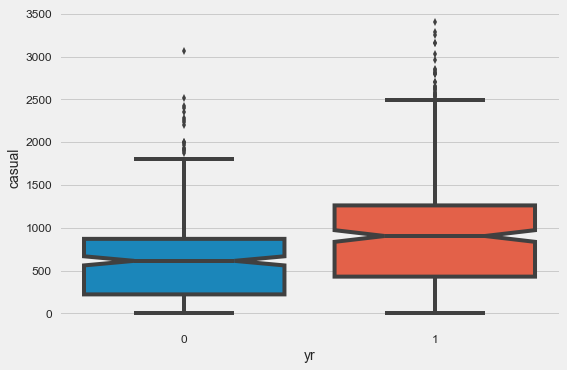

In [232]:
ax = sns.boxplot(x="yr", y="casual", data=df, notch=True)

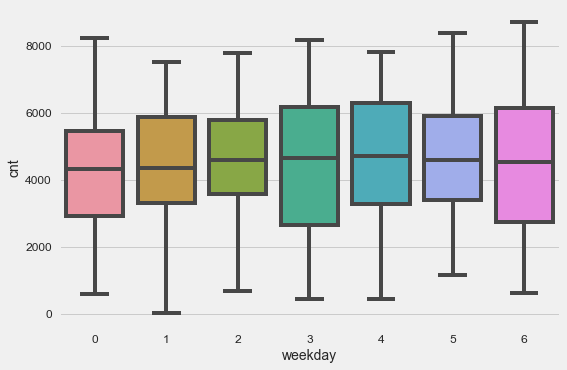

In [233]:
ax = sns.boxplot(x="weekday", y="cnt", data=df)
#ax = sns.swarmplot(x="weekday", y="cnt", data=df, color=".25")

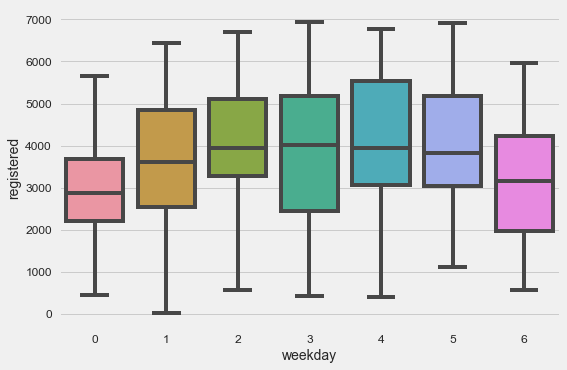

In [234]:
ax = sns.boxplot(x="weekday", y="registered", data=df)
#ax = sns.swarmplot(x="weekday", y="registered", data=df, color=".25")

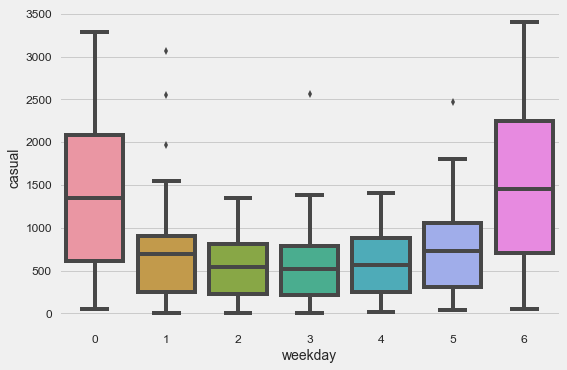

In [235]:
ax = sns.boxplot(x="weekday", y="casual", data=df)
#ax = sns.swarmplot(x="weekday", y="casual", data=df, color=".25")

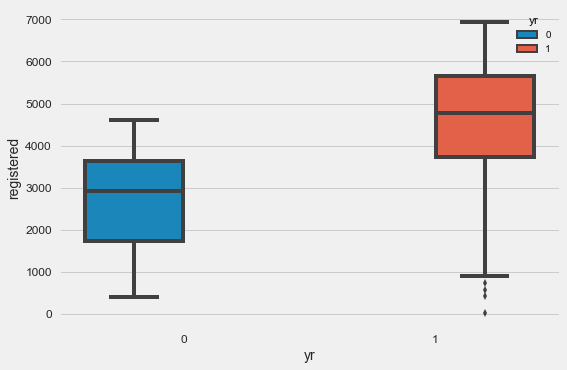

In [236]:
ax = sns.boxplot(x="yr", y="registered", data=df, hue="yr")

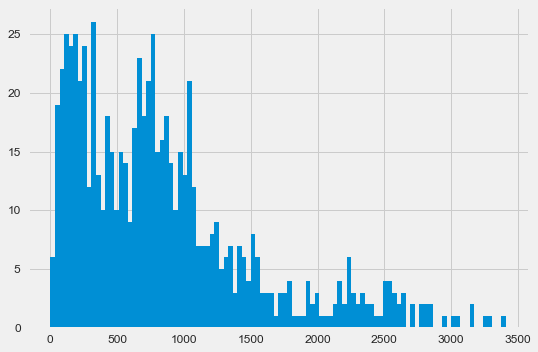

In [237]:
plt.hist(df.casual, bins= 100)
plt.show()

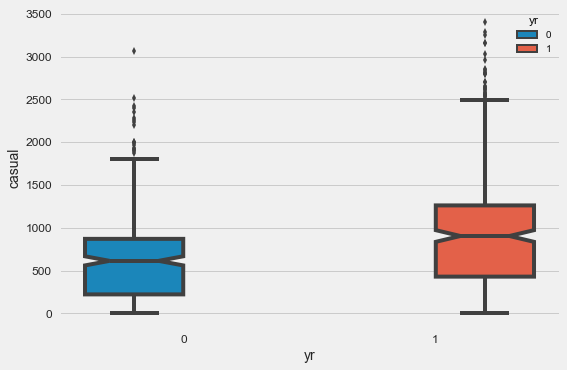

In [238]:
ax = sns.boxplot(x="yr", y="casual", data=df, hue="yr", notch=True)

# Missing value Analysis

In [239]:
#number of missing values per columna
df.isnull().sum().sort_values(ascending=False)

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

In [240]:
# converting the dteday type to datetime64
# df['dteday'] = pd.to_datetime(df['dteday'],errors="coerce")

In [241]:
# dropping the columns are not useful for machine learning.
df = df.drop(columns=['instant','dteday'])

In [242]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [243]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [245]:
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [246]:
categoric_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
continuous_variables = ['temp','atemp','hum','windspeed','casual','registered','cnt']

# Outlier Analysis

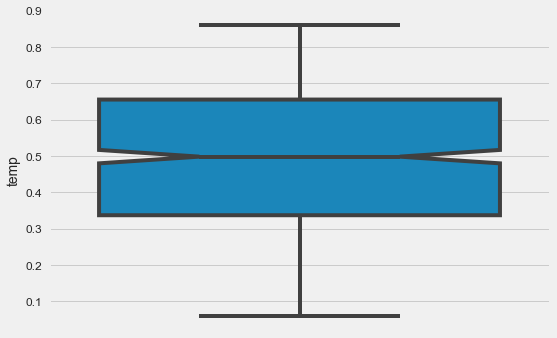

In [247]:
# Plot boxplot to visualize Outliers
ax = sns.boxplot(df['temp'],orient='v',notch=True)
#plt.title("Temperature")
plt.show()

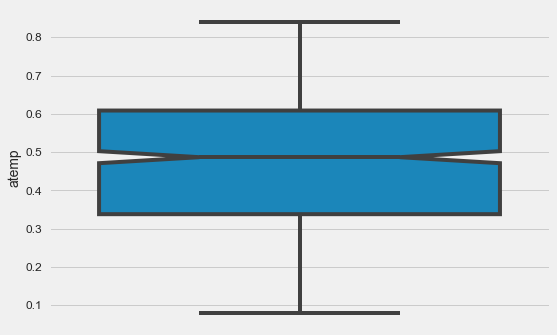

In [248]:
# Plot boxplot to visualize Outliers
ax = sns.boxplot(df['atemp'],orient='v',notch=True)
#plt.title("Feeling Temperature")
plt.show()

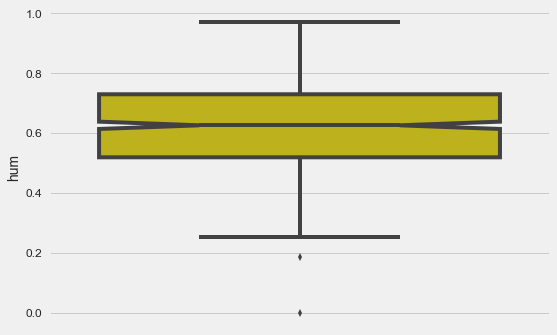

In [249]:
#Plot boxplot to visualize Outliers
ax = sns.boxplot(df['hum'],orient='v',notch=True,color='y')
#plt.title("Humidity")
plt.show()

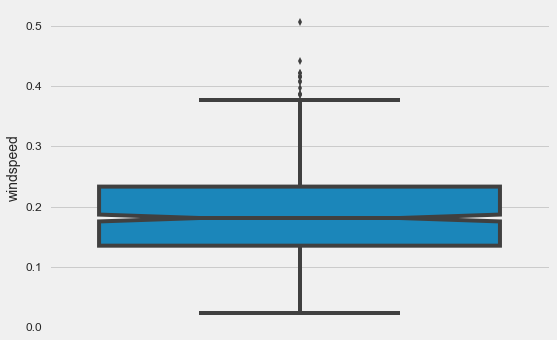

In [250]:
#Plot boxplot to visualize Outliers
ax = sns.boxplot(df['windspeed'],orient='v',notch=True)
#plt.title("Wind speed")
plt.show()

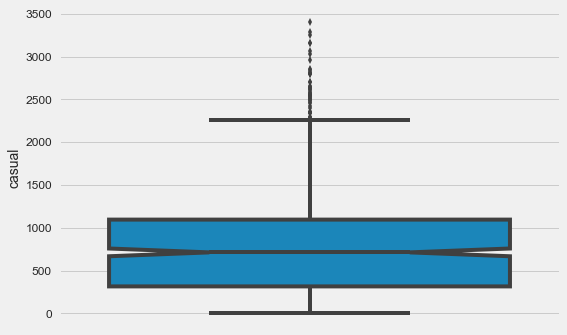

In [251]:
#Plot boxplot to visualize Outliers
ax = sns.boxplot(df['casual'],orient='v',notch=True)
#plt.title("casual users")
plt.show()

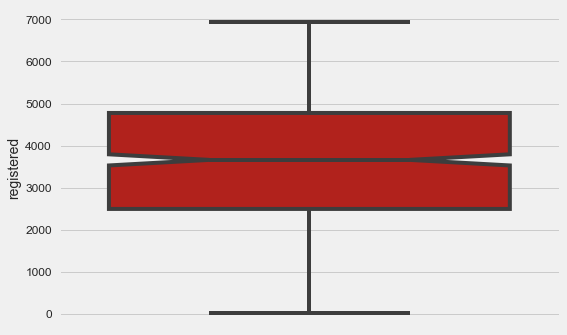

In [252]:
#Plot boxplot to visualize Outliers
ax = sns.boxplot(df['registered'],orient='v',notch=True,color='r')
plt.show()

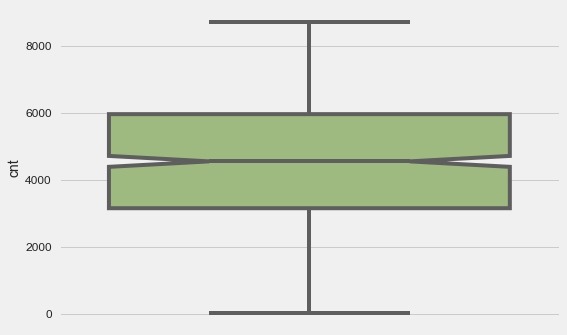

In [253]:
#Plot boxplot to visualize Outliers
ax = sns.boxplot(df['cnt'],orient='v',notch=True,color='g')
#plt.title("Total count of the users")
plt.show()

# Feature Selection 

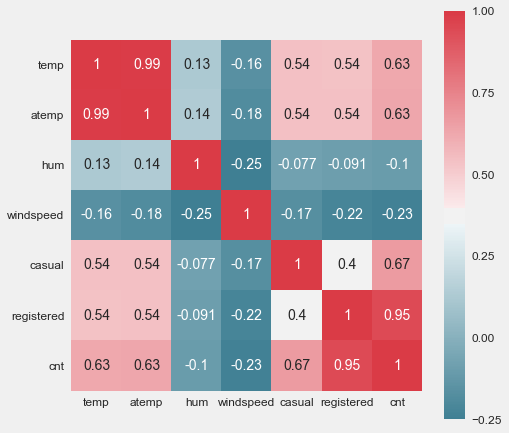

In [254]:
##Correlation analysis
#Correlation plot

# save numeric names 
#cnames = df.columns
#df_corr = df.loc[:,cnames]

df_corr = df.loc[:,continuous_variables]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7,7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [255]:
# temp has a linear relationship with cnt and also relatively high value of correlation. 
# so for Simple Linear Regression, temp seems to be a good choice.

In [256]:
# #Chi-square test of independence of variables in a contingency table.
# from scipy.stats import chi2_contingency

# for i in categoric_variables:
#     table = pd.crosstab(df['cnt'], df[i])
#     chi2, p, dof, ex = chi2_contingency(table)
#     print(i,p)

In [257]:
categoric_variables

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [258]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif

# # Create features and target
# #X = df.drop(columns=['cnt'])
# X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
# y = df['cnt']

# #Select Features With Best ANOVA F-Values
# # Create an SelectKBest object to select features with two best ANOVA F-Values
# fvalue_selector = SelectKBest(f_classif, k=4)

# # Apply the SelectKBest object to the features and target
# X_kbest = fvalue_selector.fit_transform(X, y, )



# # Show results
# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_kbest.shape[1])


In [259]:
#df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].head(3)

In [260]:
#X_kbest.dtype.names

In [261]:
#X_kbest

1    463
2    247
3     21
Name: weathersit, dtype: int64


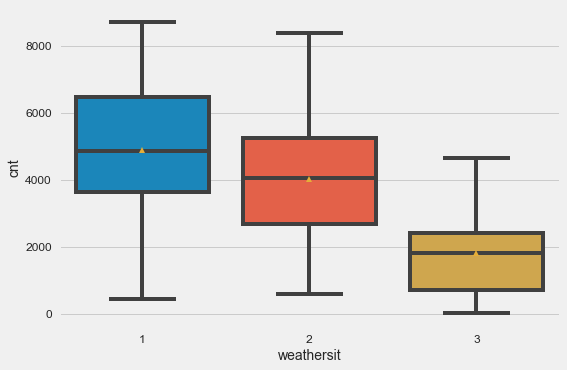

In [262]:
print (df['weathersit'].value_counts())
sns.boxplot(x=df['weathersit'], y=df['cnt'], showmeans=True)
plt.show()

# From the above plot, it is clearly visible that the mean (triangular shape in red color) of the group 
# with weathersit=3 does not overlap with another group means. We can now say that we have evidence 
# against the null hypothesis and the variables are related to each other.


In [263]:
#ANOVA F Test

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

model = smf.ols(formula='cnt ~ weathersit', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           3.11e-17
Time:                        07:52:55   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4876.7862     85.567     

In [264]:
# F-statistics = (variation among group means/ variation within group)
# if variation within group is high, F-statistics will be smaller, it supports the Null Hypothesis.
# if variation within group is low, F-statistics will be higher , suggesting strong 
# evidence for the relationship between the predictor and target variables and we can reject the null hypothesis.
# But how high value of F-statistics should be. The answer to this question lies in the concept of the p-value.
# P- value is defined as the probability of getting that observed F-statistic (after the ANOVA test) or
# more extreme value of F-statistic provided the null hypothesis is true. So, if we get very less p-value,
# it means it is extremely rare to get that F-statistic when the null hypothesis is true (sometimes it may 
# occur which is also known as Type I error) and we can reject the null hypothesis. Generally, we take the
# cutoff for p-value as 0.05 (which is 95% significance level).

In [265]:

model = smf.ols(formula='cnt ~ season', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           6.72e-67
Time:                        07:52:55   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2604.1326    116.598     22.334      

In [266]:
model = smf.ols(formula='cnt ~ yr', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     344.9
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           2.48e-63
Time:                        07:52:55   Log-Likelihood:                -6428.1
No. Observations:                 731   AIC:                         1.286e+04
Df Residuals:                     729   BIC:                         1.287e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3405.7616     83.601     40.738      0.0

In [267]:
model = smf.ols(formula='cnt ~ mnth', data=df)
results = model.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     41.90
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           4.25e-70
Time:                        07:52:55   Log-Likelihood:                -6388.6
No. Observations:                 731   AIC:                         1.280e+04
Df Residuals:                     719   BIC:                         1.286e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2176.3387    193.514     11.246      0.0

In [268]:
model = smf.ols(formula='cnt ~ holiday', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.421
Date:                Sat, 27 Jul 2019   Prob (F-statistic):             0.0648
Time:                        07:52:55   Log-Likelihood:                -6568.0
No. Observations:                 731   AIC:                         1.314e+04
Df Residuals:                     729   BIC:                         1.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4527.1042     72.582     62.372   

In [269]:
model = smf.ols(formula='cnt ~ weekday', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7829
Date:                Sat, 27 Jul 2019   Prob (F-statistic):              0.583
Time:                        07:52:55   Log-Likelihood:                -6567.3
No. Observations:                 731   AIC:                         1.315e+04
Df Residuals:                     724   BIC:                         1.318e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4228.8286    189.221     22.349   

In [270]:
model = smf.ols(formula='cnt ~ workingday', data=df)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.737
Date:                Sat, 27 Jul 2019   Prob (F-statistic):             0.0985
Time:                        07:52:55   Log-Likelihood:                -6568.3
No. Observations:                 731   AIC:                         1.314e+04
Df Residuals:                     729   BIC:                         1.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4330.1688    127.308     

In [271]:
categoric_variables

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [272]:
# # for p<0.05, we reject the Ho. Ho state that "X and Y are independent of each other." 
# 'holiday', 'weekday', 'workingday' have p > 0.05 , so Null Hypothesis stands True for these categorical features. 
# hence dropping these variable from data model. Updating the category variable.
categoric_variables = ['season', 'yr', 'mnth', 'weathersit']

In [273]:
#  The 'casual' and 'registered' columns are simply subcategories of the 'cnt' column.
#  These columns leak information on the target column so we'll have to drop them. 

# team and atemp have high value of "r". So we will drop one of them (here atemp)

df = df.drop(columns=['atemp','registered','casual','holiday','weekday','workingday'], axis=1)

In [274]:
df.describe()

,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.627894,0.190486,4504.348837
std,0.183051,0.142429,0.077498,1937.211452
min,0.059130,0.000000,0.022392,22.000000
25%,0.337083,0.520000,0.134950,3152.000000
50%,0.498333,0.626667,0.180975,4548.000000
75%,0.655417,0.730209,0.233214,5956.000000
max,0.861667,0.972500,0.507463,8714.000000


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: category(4), float64(3), int64(1)
memory usage: 26.6 KB


# Feature scaling

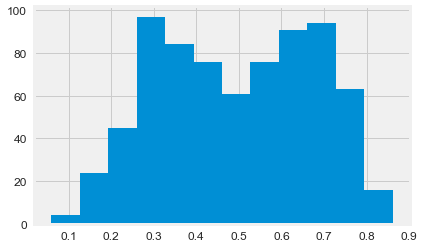

In [276]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(df['temp'], bins='auto')
plt.show()

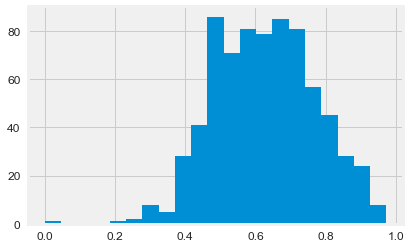

In [277]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(df['hum'], bins='auto')
plt.show()

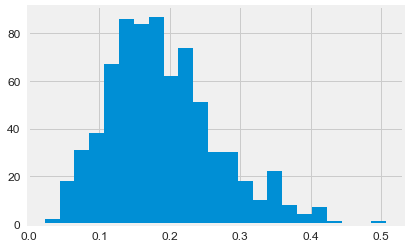

In [278]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.hist(df['windspeed'], bins='auto')
plt.show()

In [279]:
# Why removing highly correlated features is important?
# The interpretation of a regression coefficient is that it represents 
# the mean change in the target for each unit change in an feature when 
# you hold all of the other features constant. However, when features are correlated,
# changes in one feature in turn shifts another feature/features. 
# The stronger the correlation, the more difficult it is to change one 
# feature without changing another. It becomes difficult for the model to
# estimate the relationship between each feature and the target independently
# because the features tend to change in unison.

# Model development

# Linear Regression

In [280]:
# Assumptions in the Linear Regression

# 1.Linear Relationship between the features and target
# 2.Little or no Multicollinearity between the features
# 3.Homoscedasticity Assumption.
# 4.Normal distribution of residuals
# 5.Little or No autocorrelation in the residuals

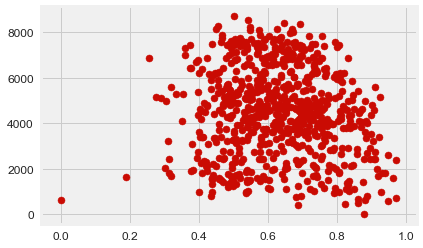

In [281]:
plt.scatter(df.hum,df.cnt,color='r')

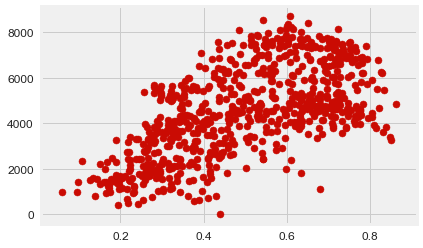

In [282]:
plt.scatter(df.temp,df.cnt,color='r')

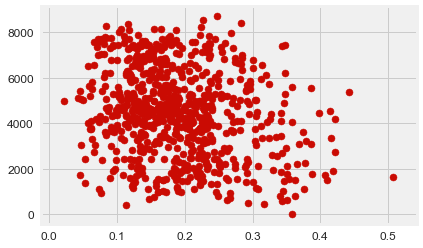

In [283]:
plt.scatter(df.windspeed,df.cnt,color='r')

# Base line model

In [284]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

X = df['temp'].values
y = df['cnt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


print("LinearRegression train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("LinearRegression train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))

print("LinearRegression test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("LinearRegression test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))

# The histogram plot in the “Error(residuals) vs Predicted values” in assumption no.3 
# also shows that the errors are normally distributed with mean close to 0.


print ("slope:" , lr.coef_[0])
print ("intercept:", lr.intercept_)
#print ("score:", lr.score)

LinearRegression train RMSE: 1498.350
LinearRegression train r2_score: 0.389
LinearRegression test RMSE: 1543.931
LinearRegression test r2_score: 0.411
slope: [6484.53372127]
intercept: [1302.12074999]


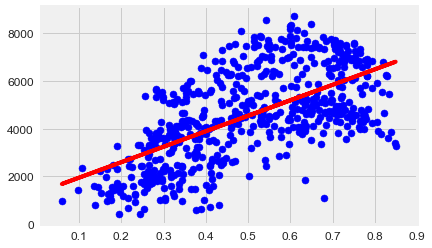

In [285]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

lin_regplot(X_train,y_train,lr)

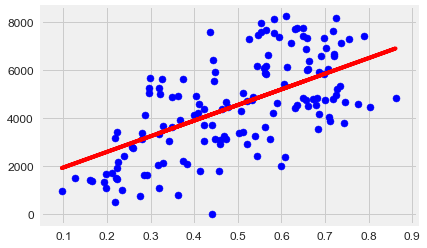

In [286]:
lin_regplot(X_test,y_test,lr)

In [287]:
#!jupyter notebook list

# RANdom SAmple Consensus (RANSAC) algorithm,
which fits a regression model to a subset of the data, the so-called inliers. Linear regression models can be heavily impacted by the presence of outliers.
In certain situations, a very small subset of our data can have a big effect on the
estimated model coefficients. Using RANSAC, we reduced the potential effect of the outliers in this dataset.

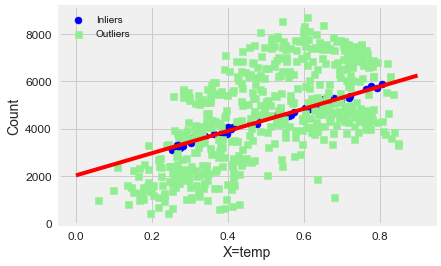

Slope: 4705.590
Intercept: 2014.940
RANSAC LinearRegression train RMSE: 1543.018
RANSAC LinearRegression train r2_score: 0.352
RANSAC LinearRegression test RMSE: 1608.483
RANSAC LinearRegression test r2_score: 0.361


In [288]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         residual_threshold=150.0,
                         random_state=0)
ransac.fit(X_train, y_train)


inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(.0, 1, .1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X_train[inlier_mask], y_train[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask],c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('X=temp')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)


y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)


print("RANSAC LinearRegression train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RANSAC LinearRegression train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))

print("RANSAC LinearRegression test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RANSAC LinearRegression test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


# Linear Regression Model

In [289]:
X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =0)

In [290]:
X.head()

,season,yr,mnth,weathersit,temp,hum,windspeed
0,1,0,1,2,0.344167,0.805833,0.160446
1,1,0,1,2,0.363478,0.696087,0.248539
2,1,0,1,1,0.196364,0.437273,0.248309
3,1,0,1,1,0.200000,0.590435,0.160296
4,1,0,1,1,0.226957,0.436957,0.186900


In [291]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


print("LinearRegression train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("LinearRegression train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))

print("LinearRegression test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("LinearRegression test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))

# The histogram plot in the “Error(residuals) vs Predicted values” in assumption no.3 
# also shows that the errors are normally distributed with mean close to 0.

LinearRegression train RMSE: 875.115
LinearRegression train r2_score: 0.788
LinearRegression test RMSE: 945.411
LinearRegression test r2_score: 0.790


In [292]:
# Since our model uses multiple explanatory variables, we can't visualize the linear
# regression line (or hyperplane to be precise) in a two-dimensional plot, but we
# can plot the residuals (the differences or vertical distances between the actual and
# predicted values) versus the predicted values to diagnose our regression model.
# Those residual plots are a commonly used graphical analysis for diagnosing
# regression models to detect nonlinearity and outliers, and to check if the errors
# are randomly distributed.

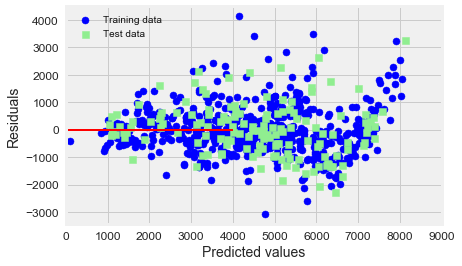

In [293]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3000, xmax=4000, lw=2, color='red')
plt.xlim([0, 9000])
plt.show()

# 

# for a good regression model, we would expect that the errors are randomly distributed and
# the residuals should be randomly scattered around the centerline. If we see patterns
# in a residual plot, it means that our model is unable to capture some explanatory information,
# which is leaked into the residuals. It is also one of the assumtions of the Linear Regression model,
# Homoscedasticity Assumption. There should be no clear pattern in the distribution and if there is a
# specific pattern,the data is heteroscedastic.


# we can also use residual plots to detect outliers, which are
# represented by the points with a large deviation from the centerline.


score: 0.7898492690378804


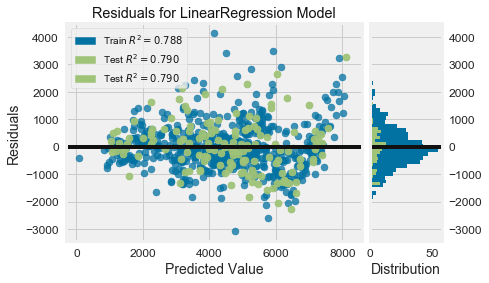

In [294]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
print ("score:", visualizer.score(X_test,y_test))
visualizer.poof()

In [295]:
lr.coef_

array([  466.81704608,  1968.38226207,   -29.70162663,  -486.21656989,
        5313.86802587, -1388.95321141, -3043.29222709])

In [296]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [297]:
coefficients

,0,0
0,season,466.817046
1,yr,1968.382262
2,mnth,-29.701627
3,weathersit,-486.216570
4,temp,5313.868026
5,hum,-1388.953211
6,windspeed,-3043.292227


In [298]:
lr.intercept_

2046.173564341811

In [299]:
# Normal distribution of the residuals can be validated by plotting a q-q plot.


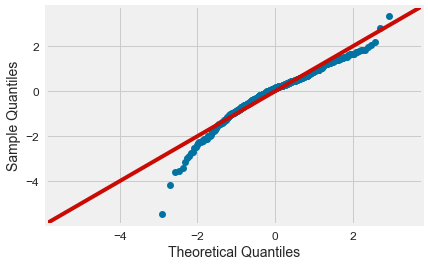

In [300]:
import statsmodels.api as sm
# statsmodels does not add intercept term automatically thus we need to create an intercept to our model.
# X_train = sma.add_constant(X_train) ## let's add an intercept (beta_0) to our model
# X_test = sma.add_constant(X_test) 

mod_fit = sm.OLS(y_train,X_train.astype(float)).fit()
res = mod_fit.resid
fig = sm.qqplot(res,fit=True,line='45')
plt.show()
# The q-q plot of the bike data set below shows that the errors(residuals) are fairly normally distributed

# ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [301]:
print (mod_fit.summary())
# Large value of the condition number might indicate that there are strong multicollinearity or other numerical problems.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2208.
Date:                Sat, 27 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:53:00   Log-Likelihood:                -4818.0
No. Observations:                 584   AIC:                             9650.
Df Residuals:                     577   BIC:                             9681.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       522.5577     67.049      7.794      0.0

In [302]:
# from scipy.stats.stats import pearsonr
# pearsonr(df.hum, df.cnt)   # (-0.10065856213715527, 0.006454143325437774)
# pearsonr(df.windspeed, df.cnt) #  (-0.23454499742167007, 1.3599586778866672e-10)

# # pearsonr returns (Pearson's correlation coefficient, 2-tailed p-value)



In [303]:
# Autocorrelation can be tested with the help of Durbin-Watson test.
# The null hypothesis of the test is that there is no serial correlation. 
# The Durbin-Watson test statistics is defined as:

# The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals.
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. 
# This statistic will always be between 0 and 4. The closer to 0 the statistic, 
# the more evidence for positive serial correlation. 
# The closer to 4, the more evidence for negative serial correlation.


# Here value of Durbin-Watson test is 1.968 quite close to 2 as said before when the value of Durbin-Watson 
# is equal to 2, r takes the value 0 from the equation 2*(1-r),which in turn tells us that the residuals 
# are not correlated.


# Detecting Outliers: 


In [304]:
# Firstly we try to get the studentized residuals using get_influence( ). 
# The studentized residuals are saved in resid_student.
influence = mod_fit.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([X_train,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

,season,yr,mnth,weathersit,temp,hum,windspeed,Studentized Residuals
0,1,0,1,2,0.344167,0.805833,0.160446,-0.615321
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.866466
2,1,0,1,1,0.196364,0.437273,0.248309,0.488221
3,1,0,1,1,0.200000,0.590435,0.160296,-0.068610
4,1,0,1,1,0.226957,0.436957,0.186900,0.189681


In [305]:
# If the absolute value of studentized residuals is more than 3 then that observation
# is considered as an outlier and hence should be removed. 
# We try to create a logical vector for the absolute studentized residuals more than 3

In [306]:
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]

,season,yr,mnth,weathersit,temp,hum,windspeed,Studentized Residuals
93,2,0,4,1,0.573333,0.426250,0.385571,-4.200653
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.398823
253,3,0,9,1,0.653333,0.713750,0.115054,3.420585
276,4,0,10,1,0.484167,0.710000,0.205854,-3.130231
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.571634
343,4,0,12,1,0.275000,0.507500,0.233221,-5.567461
493,2,1,5,2,0.581667,0.685833,0.296029,-3.509396


In [307]:
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index

In [308]:
ind

Int64Index([93, 118, 253, 276, 301, 343, 493], dtype='int64')

# Detecting and Removing Multicollinearity 

In [310]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
X_vif = add_constant(X_train)
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values.astype(np.float64), j) for j in range(X_vif.shape[1])]
vif["features"] = X_vif.columns
vif[['features','VIF Factor']]

,features,VIF Factor
0,const,45.579683
1,season,3.759572
2,yr,1.034658
3,mnth,3.561089
4,weathersit,1.836585
5,temp,1.198144
6,hum,2.023005
7,windspeed,1.172051


# Linear Regression using RANSAC regressor ( without outliers) 

In [196]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         residual_threshold=10.0,
                         random_state=0)
ransac.fit(X_train, y_train)

y_train_pred = ransac.predict(X_train)
y_test_pred = ransac.predict(X_test)


print("RANSAC LinearRegression train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RANSAC LinearRegression test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("RANSAC LinearRegression train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))
print("RANSAC LinearRegression test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


#residual_threshold=5.0, score = 0.48012200342584654
#residual_threshold=100.0,score = 0.7767968859904463
print("RANSAC LinearRegression score: %.3f" % (ransac.score(X_train,y_train)))

RANSAC LinearRegression train RMSE: 929.193
RANSAC LinearRegression test RMSE: 1006.116
RANSAC LinearRegression train r2_score: 0.751
RANSAC LinearRegression test r2_score: 0.762
RANSAC LinearRegression score: 0.751


In [99]:
np.max(y_train_pred - y_train)

4918.762429169621

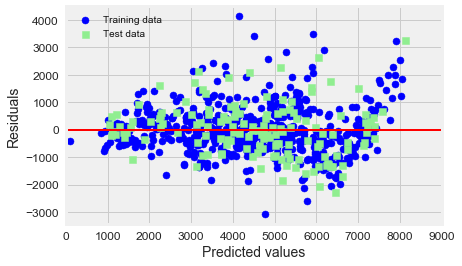

In [313]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-4000, xmax=9500, lw=2, color='red')
plt.xlim([0, 9000])
plt.show()

# Linear Regression using LASSO regularization 

In [322]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


print("LASSO LinearRegression train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("LASSO LinearRegression train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))

print("LASSO LinearRegression test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("LASSO LinearRegression test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


LASSO LinearRegression train RMSE: 875.170
LASSO LinearRegression train r2_score: 0.788
LASSO LinearRegression test RMSE: 944.205
LASSO LinearRegression test r2_score: 0.790


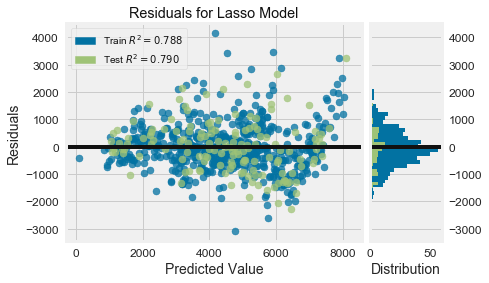

In [323]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

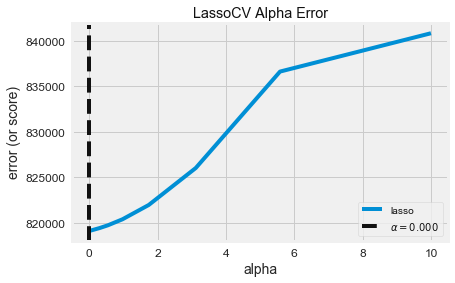

In [324]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-100, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)
g = visualizer.poof()

In [325]:
# The linear regression method is great for datasets with lots of continuous data,
# but a lot of the columns in this dataset is not continuous, but rather categorical.

# also the error metric RMSE is vary high in case of Linear Regression.. 
# We can use the decision tree to see if we can improve our predictions.

# DT Regression

An advantage of the decision tree algorithm is that it does not require any
transformation of the features if we are dealing with nonlinear data.

It uses MSE as Impurity measure for Regression. 

In the context of decision tree regression, the MSE is often also referred to as
within-node variance, which is why the splitting criterion is also better known
as variance reduction.

DT is prone to overfitting.

In [326]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(max_depth=3,random_state=0)
dt_clf.fit(X_train, y_train)
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)


print("DT train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("DT test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("DT train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))
print("DT test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


DT train RMSE: 885.153
DT test RMSE: 1029.278
DT train r2_score: 0.784
DT test r2_score: 0.751


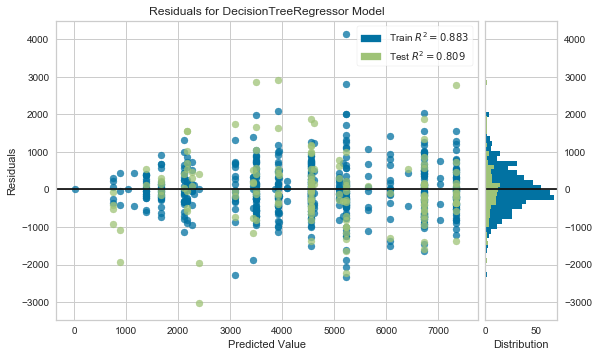

In [107]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(dt_clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

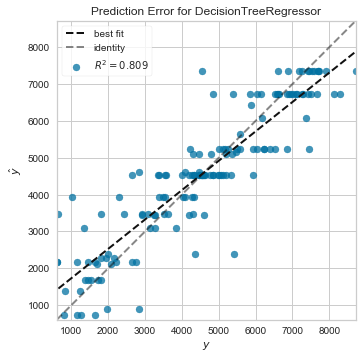

In [108]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

from yellowbrick.regressor import PredictionError
visualizer = PredictionError(dt_clf)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


In [109]:
# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=-4000, xmax=5500, lw=2, color='red')
# plt.xlim([0, 9000])
# plt.show()

In [110]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf,out_file='tree.dot', feature_names=X_test.columns)


In [111]:
X_test.columns

Index(['season', 'yr', 'mnth', 'weathersit', 'temp', 'hum', 'windspeed'], dtype='object')

In [112]:
# RMSE is lower as compared to Linear Regression but the test RMSE is highere as c/f fro train dataset.
# so this model is prone to overfitting. 

# Randon Forest Regression

In [329]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=500,criterion='mse',random_state=1,n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


print("RF train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RF test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("RF train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))
print("RF test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


RF train RMSE: 258.620
RF test RMSE: 679.580
RF train r2_score: 0.982
RF test r2_score: 0.891


In [114]:
# Unfortunately, we see that the random forest tends to overfit the training data.
# However, it's still able to explain the relationship between the target and
# explanatory variables relatively well ( R2 = 0.899 on the test dataset).

In [115]:
np.max(y_test_pred - y_test)

2482.4049999999997

In [116]:
# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o',s=35, label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', s=35, label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=-4000, xmax=5500, lw=2, color='red')
# plt.xlim([0, 9000])
# plt.show()

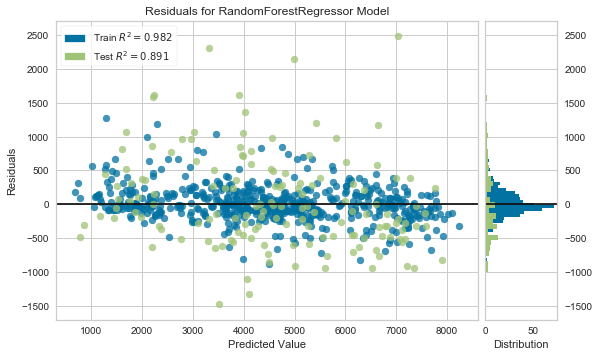

In [117]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(rf_clf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

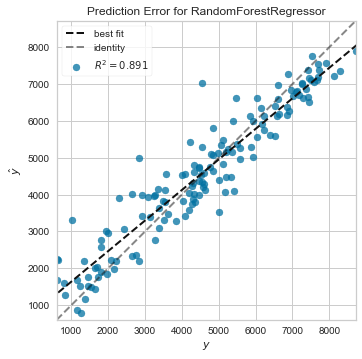

In [118]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf_clf)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


In [119]:
# As it was already summarized by the R2 coefficient, we can see that the model
# fits the training data better than the test data, as indicated by the outliers in the y
# axis direction.

# random forest hyper parameter tuning using gridsearchCV

In [120]:


# random forest hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from pprint import pprint

# First create the base model to tune
tuned_rf = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth
#'min_samples_split': min_samples_split,
#'min_samples_leaf': min_samples_leaf,
#'bootstrap': bootstrap
             }

pprint(param_grid)

grid_search = GridSearchCV(tuned_rf, param_grid, cv=5, verbose=2, n_jobs = -1)

# Fit the random search model
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


In [121]:
tuned_rf = RandomForestRegressor(n_estimators=850,random_state=1,n_jobs=-1,max_depth=None, max_features='sqrt')
tuned_rf.fit(X_train, y_train)
y_train_pred = tuned_rf.predict(X_train)
y_test_pred = tuned_rf.predict(X_test)


print("Tuned RF train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Tuned RF test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("Tuned RF train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))
print("Tuned RF test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))

# Tuned RF train RMSE: 245.400
# Tuned RF test RMSE: 660.611
# Tuned RF train r2_score: 0.983
# Tuned RF test r2_score: 0.897

#{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Tuned RF train RMSE: 312.497
# Tuned RF test RMSE: 697.318
# Tuned RF train r2_score: 0.973
# Tuned RF test r2_score: 0.886



Tuned RF train RMSE: 249.778
Tuned RF test RMSE: 697.249
Tuned RF train r2_score: 0.983
Tuned RF test r2_score: 0.886


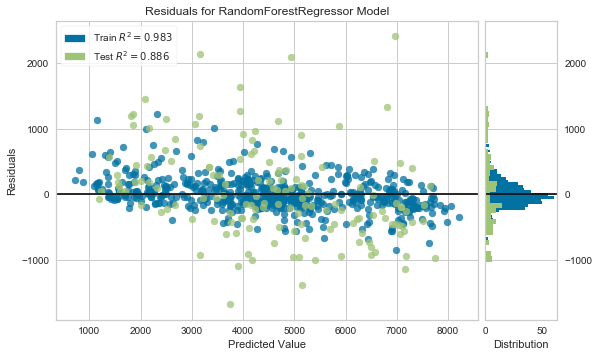

In [122]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(tuned_rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

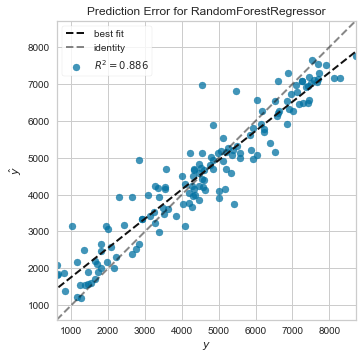

In [123]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

from yellowbrick.regressor import PredictionError
visualizer = PredictionError(tuned_rf)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


# SVM Regression 

In [124]:
# #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR

# from sklearn.svm import SVR
# svm_clf = SVR(kernel='rbf', degree=5, gamma='scale', C=1.0, epsilon=0.1)
# svm_clf.fit(X_train, y_train) 

# y_train_pred = svm_clf.predict(X_train)
# y_test_pred = svm_clf.predict(X_test)


# print("SVM train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))
# print("SVM test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

# print("SVM train r2_score: %.3f" % (r2_score(y_train, y_train_pred)))
# print("SVM test r2_score: %.3f" % (r2_score(y_test, y_test_pred)))


In [125]:
# plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o',s=35, label='Training data')
# plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', s=35, label='Test data')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.hlines(y=0, xmin=-4000, xmax=9500, lw=2, color='red')
# plt.xlim([0, 9000])
# plt.show()

In [126]:
#df = pd.get_dummies(df)
X = df.drop('cnt', axis=1)
y = df['cnt']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.2,random_state =0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: category(4), float64(3), int64(1)
memory usage: 26.6 KB


# LightGBM 

In [144]:
# import lightgbm library
import lightgbm as lgb   

# convert our training data into LightGBM dataseta
train_data = lgb.Dataset(X_train, label=y_train) 
test_data = lgb.Dataset(X_test, label=y_test) 
valid_data = lgb.Dataset(X_valid, label=y_valid) 

# created a python dictionary with parameters and their values. Accuracy of model totally depends on 
# fine tuning the values provided to parameters

params = {}
params['learning_rate'] = 0.5
params['boosting_type'] = 'gbrt'
params['objective'] = 'regression'
params['metric'] = 'l2_root'   # rmse
params['sub_feature'] = 0.3
params['max_bin']=100
params['num_leaves'] = 50
params['max_depth'] = 5
params['min_data_in_leaf']=50    # default = 20
params['min_sum_hessian_in_leaf']=5
params['lambda_12']=1.0
params['min_gain_to_split']=10.0
params['bagging_fraction']=0.8
params['bagging_freq']=100
params['feature_fraction']=0.8


# training the model 
#validation_data = lgb.Dataset(valid_data, reference=train_data)
num_round = 100
#bst = lgb.train(params, train_data, valid_sets=[validation_data], early_stopping_rounds=5)
bst = lgb.train(params, train_data, num_round, valid_sets=valid_data, early_stopping_rounds=15)

# predict the model on train data
y_pred_train = bst.predict(X_train,num_iteration = bst.best_iteration)

# predict the model on test data
y_pred_test = bst.predict(X_test,num_iteration = bst.best_iteration)

# get the loss metric
from sklearn.metrics import r2_score
print("lightgbm train RMSE: %.3f" %  np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("lightgbm test RMSE: %.3f" %  np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("lightgbm train r2_score: %.3f" %  r2_score(y_train, y_pred_train))
print("lightgbm test r2_score: %.3f" %  r2_score(y_test, y_pred_test))


[1]	valid_0's rmse: 1652.89
Training until validation scores don't improve for 15 rounds.
[2]	valid_0's rmse: 1382.77
[3]	valid_0's rmse: 1105.47
[4]	valid_0's rmse: 1012.17
[5]	valid_0's rmse: 936.154
[6]	valid_0's rmse: 880.425
[7]	valid_0's rmse: 841.707
[8]	valid_0's rmse: 795.73
[9]	valid_0's rmse: 790.634
[10]	valid_0's rmse: 776.699
[11]	valid_0's rmse: 788.914
[12]	valid_0's rmse: 793.081
[13]	valid_0's rmse: 793.179
[14]	valid_0's rmse: 779.908
[15]	valid_0's rmse: 762.995
[16]	valid_0's rmse: 772.439
[17]	valid_0's rmse: 769.037
[18]	valid_0's rmse: 761.033
[19]	valid_0's rmse: 754.763
[20]	valid_0's rmse: 754.794
[21]	valid_0's rmse: 751.117
[22]	valid_0's rmse: 759.318
[23]	valid_0's rmse: 756.339
[24]	valid_0's rmse: 754.904
[25]	valid_0's rmse: 766.12
[26]	valid_0's rmse: 761.824
[27]	valid_0's rmse: 759.119
[28]	valid_0's rmse: 756.481
[29]	valid_0's rmse: 758.49
[30]	valid_0's rmse: 764.324
[31]	valid_0's rmse: 769.851
[32]	valid_0's rmse: 774.106
[33]	valid_0's rmse: 7

# ADA boost

In [129]:

from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, learning_rate=0.5, loss='linear')
ada_clf.fit(X_train, y_train)
y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)

print("AdaBoostRegressor train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("AdaBoostRegressor train r2_score: %.3f" %  r2_score(y_train, y_pred_train))

print("AdaBoostRegressor test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("AdaBoostRegressor test r2_score: %.3f" %  r2_score(y_test, y_pred_test))



AdaBoostRegressor train RMSE: 702.763
AdaBoostRegressor train r2_score: 0.857
AdaBoostRegressor test RMSE: 903.969
AdaBoostRegressor test r2_score: 0.808


# GradientBoostingRegressor

In [130]:

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, subsample=0.25)
gbrt.fit(X_train, y_train)
y_pred_train = gbrt.predict(X_train)
y_pred_test = gbrt.predict(X_test)

print("GradientBoostingRegressor train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("GradientBoostingRegressor train r2_score: %.3f" %  r2_score(y_train, y_pred_train))

print("GradientBoostingRegressor RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("GradientBoostingRegressor r2_score: %.3f" %  r2_score(y_test, y_pred_test))


GradientBoostingRegressor train RMSE: 959.131
GradientBoostingRegressor train r2_score: 0.734
GradientBoostingRegressor RMSE: 1126.957
GradientBoostingRegressor r2_score: 0.701


# XGBoost 

In [131]:

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(booster='gbtree',n_estimators=500,learning_rate=0.05,
                               max_depth=4,colsample_bytree=0.8,subsample=0.5, alpha=10)
xgb_reg.fit(X_train.astype(float), y_train)
y_pred_train = xgb_reg.predict(X_train.astype(float))
y_pred_test = xgb_reg.predict(X_test.astype(float))

#print(xgb_reg)

print("XGBRegressor train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("XGBRegressor train r2_score: %.3f" %  r2_score(y_train, y_pred_train))

print("XGBRegressor test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("XGBRegressor test r2_score: %.3f" %  r2_score(y_test, y_pred_test))

[00:02:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor train RMSE: 171.560
XGBRegressor train r2_score: 0.991
XGBRegressor test RMSE: 729.637
XGBRegressor test r2_score: 0.875


In [330]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X.astype(float),label=y)
xgb_reg_clf = xgb.XGBRegressor(objective="reg:linear", booster='gbtree')

#objective="reg:linear"
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
colsample_bytree= [0.3,0.5,0.7,0.9]
learning_rate=[0.01,0.05,0.1,0.2,0.5]
max_depth=[1,2,3,4,5]
alpha=[10]

# # Create the random grid
param_grid = {
    'n_estimators': n_estimators,
    'colsample_bytree': colsample_bytree,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'alpha': alpha
 }

pprint(param_grid)
print(xgb_reg_clf)

# grid_search = GridSearchCV(xgb_reg_clf, param_grid, cv=3, verbose=2, n_jobs = -1)

# # # # Fit the random search model
# grid_search.fit(X_train.astype(float), y_train)

# print(grid_search.best_params_)

# params = {"objective":"reg:linear",'colsample_bytree': 0.8,'learning_rate': 0.05,'max_depth': 5, 'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
#                     early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)



{'alpha': [10],
 'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
 'max_depth': [1, 2, 3, 4, 5],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950,
                  1000]}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
  

In [135]:
cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,611.997949,5.509315,794.333557,42.263262


In [141]:
xgb_reg = xgb.XGBRegressor(booster='gbtree',n_estimators=150,learning_rate=0.05,
                               max_depth=4,colsample_bytree=0.7,subsample=0.5, alpha=10,seed=123)
xgb_reg.fit(X_train.astype(float), y_train)
y_pred_train = xgb_reg.predict(X_train.astype(float))
y_pred_test = xgb_reg.predict(X_test.astype(float))

#print(xgb_reg)

print("XGBRegressor train RMSE: %.3f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("XGBRegressor train r2_score: %.3f" %  r2_score(y_train, y_pred_train))

print("XGBRegressor test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("XGBRegressor test r2_score: %.3f" %  r2_score(y_test, y_pred_test))

[00:11:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor train RMSE: 365.651
XGBRegressor train r2_score: 0.961
XGBRegressor test RMSE: 665.499
XGBRegressor test r2_score: 0.896


[00:22:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


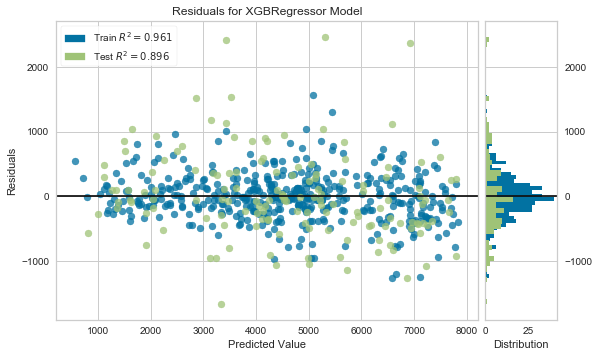

In [147]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(xgb_reg)

visualizer.fit(X_train.astype(float), y_train)  # Fit the training data to the model
visualizer.score(X_test.astype(float), y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data


[00:22:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


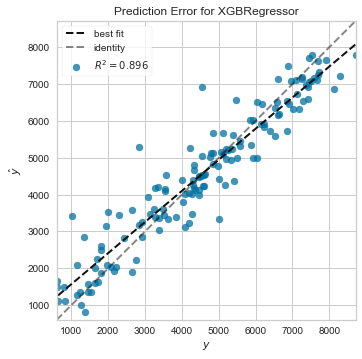

In [149]:
# A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model.
# This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this
# plot by comparing against the 45 degree line, where the prediction exactly matches the model.

from yellowbrick.regressor import PredictionError
visualizer = PredictionError(xgb_reg)
visualizer.fit(X_train.astype(float), y_train)  # Fit the training data to the visualizer
visualizer.score(X_test.astype(float), y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
